In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/amp-data-set/AMP_TrainSet.csv
/kaggle/input/amp-data-set/Test.csv


In [2]:
#import the necessary libraries you are going to use
import warnings
warnings.filterwarnings('ignore')

# -----> Put your code here below:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Now loading the datasets

In [3]:
Train = pd.read_csv("/kaggle/input/amp-data-set/AMP_TrainSet.csv")
Test = pd.read_csv("/kaggle/input/amp-data-set/Test.csv")

#the code loads the datasets into the environment haveing specified the path from which the datasets are to be pulled

# At this point we are carrying out exploratory data analysis(EDA) which summarizes the main characteristics in the data set

## Checking dimensions of the datasets

In [4]:
# check the dimensions of your data

Train.shape, Test.shape

#This command enables us to know the dimensions of our datasets which are basically the rows and columns that are contained in them.

((3038, 12), (758, 11))

# The Train dataset has 3038 rows and 12 columns while the test dataset has 758 rows and 11 columns  

## Checking out the datasets

In [5]:
Train.head(10)
#checks the first ten rows of the training dataset to view what kind of data to expect

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
0,5.0,0.000,0.951,74.842,0.975,-3.663,0,0.282,73.444,5.661,1.041,1
1,4.0,5.405,0.931,71.595,0.957,-4.011,1,0.600,68.222,6.537,1.453,1
2,5.5,5.405,0.873,73.595,0.961,-2.512,0,0.593,69.444,4.934,1.722,1
3,5.0,4.167,0.895,66.250,0.999,-1.362,0,0.614,67.222,4.316,1.382,1
4,7.5,8.537,0.932,64.720,0.979,-2.091,0,0.616,72.944,4.540,1.539,1
5,5.0,7.692,1.030,78.949,0.976,-3.091,1,0.511,78.778,5.992,1.091,1
6,3.0,6.897,0.930,78.586,0.957,-3.544,1,0.385,78.222,6.284,1.467,1
7,2.0,5.882,0.868,76.588,0.949,-5.832,0,0.154,76.588,6.479,1.086,1
8,7.0,2.632,0.857,60.447,1.012,-0.292,0,0.188,64.333,3.849,1.925,1
9,9.0,0.000,0.911,65.808,1.049,-3.888,0,0.361,63.222,6.327,1.216,1


In [6]:
Test.head(10)
#checks the first ten rows of the test dataset to view what kind of data to expect

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104
0,4.0,3.704,0.873,73.519,0.987,-4.833,0,0.382,74.556,7.225,1.234
1,4.0,4.444,0.892,62.444,0.931,-0.584,0,0.320,56.056,4.942,1.853
2,2.0,0.000,0.901,47.000,1.039,-5.664,0,0.164,47.000,5.969,1.174
3,4.5,0.000,0.869,69.222,0.982,-5.423,0,2.010,69.222,5.462,1.138
4,-4.0,21.591,1.061,71.682,0.976,-2.002,0,2.758,66.000,5.582,1.453
5,4.5,6.977,0.895,68.512,0.950,-1.878,0,3.090,72.000,5.779,1.844
6,12.0,3.175,1.022,74.460,1.010,-3.225,0,3.172,76.722,5.664,1.215
7,1.5,3.704,0.932,69.519,0.977,-2.509,0,2.543,72.000,4.251,1.560
8,3.0,3.333,0.903,59.500,0.963,-1.682,0,2.990,66.000,5.175,1.514
9,4.0,0.000,0.873,72.792,0.998,-4.943,0,2.985,77.444,5.626,1.621


# The command showed us what data we are dealing with in the datasets

In [7]:
Train.dtypes,  Test.dtypes
#the code checks to see the type of data that we have in each dataset

(FULL_Charge           float64
 FULL_AcidicMolPerc    float64
 FULL_AURR980107       float64
 FULL_DAYM780201       float64
 FULL_GEOR030101       float64
 FULL_OOBM850104       float64
 NT_EFC195               int64
 AS_MeanAmphiMoment    float64
 AS_DAYM780201         float64
 AS_FUKS010112         float64
 CT_RACS820104         float64
 CLASS                   int64
 dtype: object,
 FULL_Charge           float64
 FULL_AcidicMolPerc    float64
 FULL_AURR980107       float64
 FULL_DAYM780201       float64
 FULL_GEOR030101       float64
 FULL_OOBM850104       float64
 NT_EFC195               int64
 AS_MeanAmphiMoment    float64
 AS_DAYM780201         float64
 AS_FUKS010112         float64
 CT_RACS820104         float64
 dtype: object)

# from the above code we found that in both datasets, the only data types are floats and integers

In [8]:
Train.isnull().sum(), Test.isnull().sum()
#the code above checks whethere there is any missing value in the dataset

(FULL_Charge           0
 FULL_AcidicMolPerc    0
 FULL_AURR980107       0
 FULL_DAYM780201       0
 FULL_GEOR030101       0
 FULL_OOBM850104       0
 NT_EFC195             0
 AS_MeanAmphiMoment    0
 AS_DAYM780201         0
 AS_FUKS010112         0
 CT_RACS820104         0
 CLASS                 0
 dtype: int64,
 FULL_Charge           0
 FULL_AcidicMolPerc    0
 FULL_AURR980107       0
 FULL_DAYM780201       0
 FULL_GEOR030101       0
 FULL_OOBM850104       0
 NT_EFC195             0
 AS_MeanAmphiMoment    0
 AS_DAYM780201         0
 AS_FUKS010112         0
 CT_RACS820104         0
 dtype: int64)



# From the code above we found that there is no missing data in any of the datasets

In [9]:
Train.describe()

#code to provide the descriptive statistcis of the dataset

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000
mean,2.060237,8.521520,0.971410,73.668760,0.994007,-2.432927,0.088545,15.683233,73.650828,5.911361,1.235255,0.500000
std,3.819929,7.586652,0.107413,8.527489,0.031333,1.707223,0.284133,11.575665,9.166092,0.693689,0.210012,0.500082
min,-16.000000,0.000000,0.684000,42.750000,0.866000,-10.432000,0.000000,0.041000,42.778000,3.533000,0.785000,0.000000
25%,0.000000,2.516000,0.895000,68.294000,0.974000,-3.606000,0.000000,5.587500,67.556000,5.459250,1.082000,0.000000
50%,2.000000,7.143000,0.963000,74.059500,0.994000,-2.296500,0.000000,14.988500,73.697000,5.925500,1.184000,0.500000
75%,4.000000,13.158000,1.041000,79.343750,1.011000,-1.283250,0.000000,26.807750,79.778000,6.382000,1.351000,1.000000
max,30.000000,46.667000,1.451000,101.682000,1.196000,3.576000,1.000000,51.280000,103.167000,8.662000,2.192000,1.000000


In [10]:
Test.describe()

#code to provide the descriptive statistcis of the dataset

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,2.073879,8.945091,0.973046,73.821891,0.994212,-2.397922,0.084433,15.570067,73.844204,5.904492,1.250189
std,4.230615,7.814449,0.110676,8.029524,0.032370,1.597138,0.278219,11.362589,8.915193,0.656911,0.218102
min,-13.000000,0.000000,0.699000,47.000000,0.889000,-7.844000,0.000000,0.060000,47.000000,3.843000,0.841000
25%,-0.500000,2.721750,0.894000,68.740250,0.973000,-3.457250,0.000000,5.709000,68.346000,5.471250,1.096000
50%,2.000000,7.500000,0.965000,74.069500,0.994000,-2.238000,0.000000,15.057000,73.646000,5.935500,1.188000
75%,4.000000,14.230250,1.053500,79.284750,1.013000,-1.306250,0.000000,25.290250,80.069250,6.375250,1.378500
max,30.000000,44.118000,1.431000,102.929000,1.182000,2.017000,1.000000,50.098000,102.929000,7.588000,2.283000


# The above code showed us the descriptive statistics of the datasets which will be useful going forward.

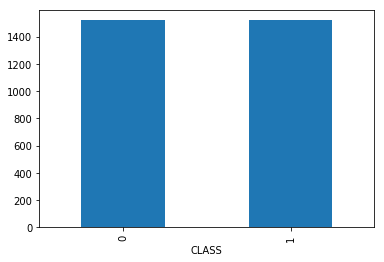

In [11]:
Train.groupby('CLASS').size().plot(kind='bar')
#code indicates whether the categorical values are imbalanced or not 

# From the plot we can see that distribution in the variable CLASS is balanced

# Determining correlation between variables

In [12]:
Train.corr(method='pearson')

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
FULL_Charge,1.000000,-0.612996,-0.490977,-0.434603,-0.058725,-0.283758,0.088068,0.355477,-0.365374,-0.090570,0.232929,0.534602
FULL_AcidicMolPerc,-0.612996,1.000000,0.794796,0.541481,0.115201,0.513344,-0.143168,-0.431590,0.449621,0.002334,-0.213543,-0.598816
FULL_AURR980107,-0.490977,0.794796,1.000000,0.548253,0.346139,0.462712,-0.169540,-0.426097,0.456260,0.032958,-0.403599,-0.584111
FULL_DAYM780201,-0.434603,0.541481,0.548253,1.000000,0.010118,0.334778,-0.090058,-0.408793,0.894191,0.055915,-0.326792,-0.554838
FULL_GEOR030101,-0.058725,0.115201,0.346139,0.010118,1.000000,0.319157,-0.230417,-0.160269,-0.029085,0.040480,-0.151935,-0.260470
FULL_OOBM850104,-0.283758,0.513344,0.462712,0.334778,0.319157,1.000000,-0.230561,-0.336297,0.275640,-0.452769,0.155304,-0.453287
NT_EFC195,0.088068,-0.143168,-0.169540,-0.090058,-0.230417,-0.230561,1.000000,0.178683,-0.036844,0.145924,0.080898,0.260702
AS_MeanAmphiMoment,0.355477,-0.431590,-0.426097,-0.408793,-0.160269,-0.336297,0.178683,1.000000,-0.322378,0.025580,0.171524,0.693552
AS_DAYM780201,-0.365374,0.449621,0.456260,0.894191,-0.029085,0.275640,-0.036844,-0.322378,1.000000,0.045562,-0.256060,-0.437168
AS_FUKS010112,-0.090570,0.002334,0.032958,0.055915,0.040480,-0.452769,0.145924,0.025580,0.045562,1.000000,-0.445284,0.033432


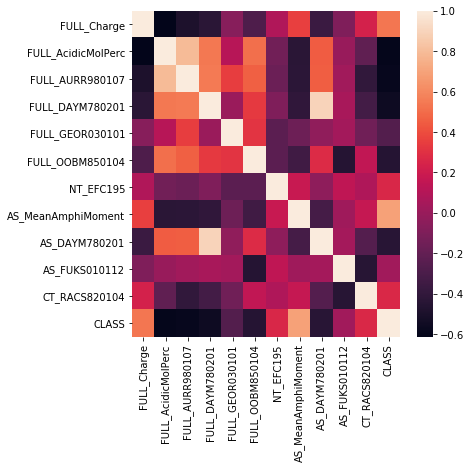

In [13]:
plt.figure(figsize=(6,6))
sns.heatmap(Train.corr(method='pearson'))

In [14]:
Train.corr(method= 'pearson')['CLASS']

FULL_Charge           0.534602
FULL_AcidicMolPerc   -0.598816
FULL_AURR980107      -0.584111
FULL_DAYM780201      -0.554838
FULL_GEOR030101      -0.260470
FULL_OOBM850104      -0.453287
NT_EFC195             0.260702
AS_MeanAmphiMoment    0.693552
AS_DAYM780201        -0.437168
AS_FUKS010112         0.033432
CT_RACS820104         0.267652
CLASS                 1.000000
Name: CLASS, dtype: float64

# The plot below is of histograms of the dataset and this shows us the distribution of each variable in the dataset

<Figure size 1728x1728 with 0 Axes>

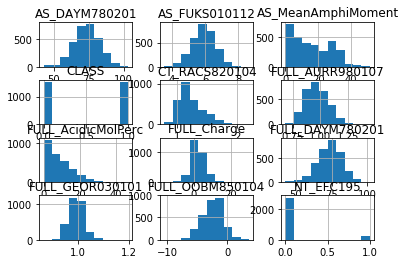

In [15]:
plt.figure(figsize=(24,24))
Train.hist()
plt.show()

# The plots below show presence or absence of outliers in each variable

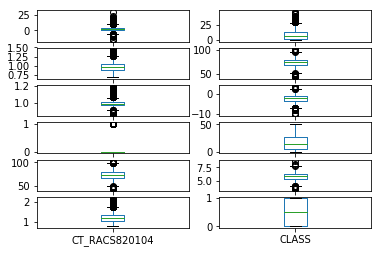

In [16]:
Train.plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False)
plt.show()

# The plot below shows us the distribution of each variable compared with one another

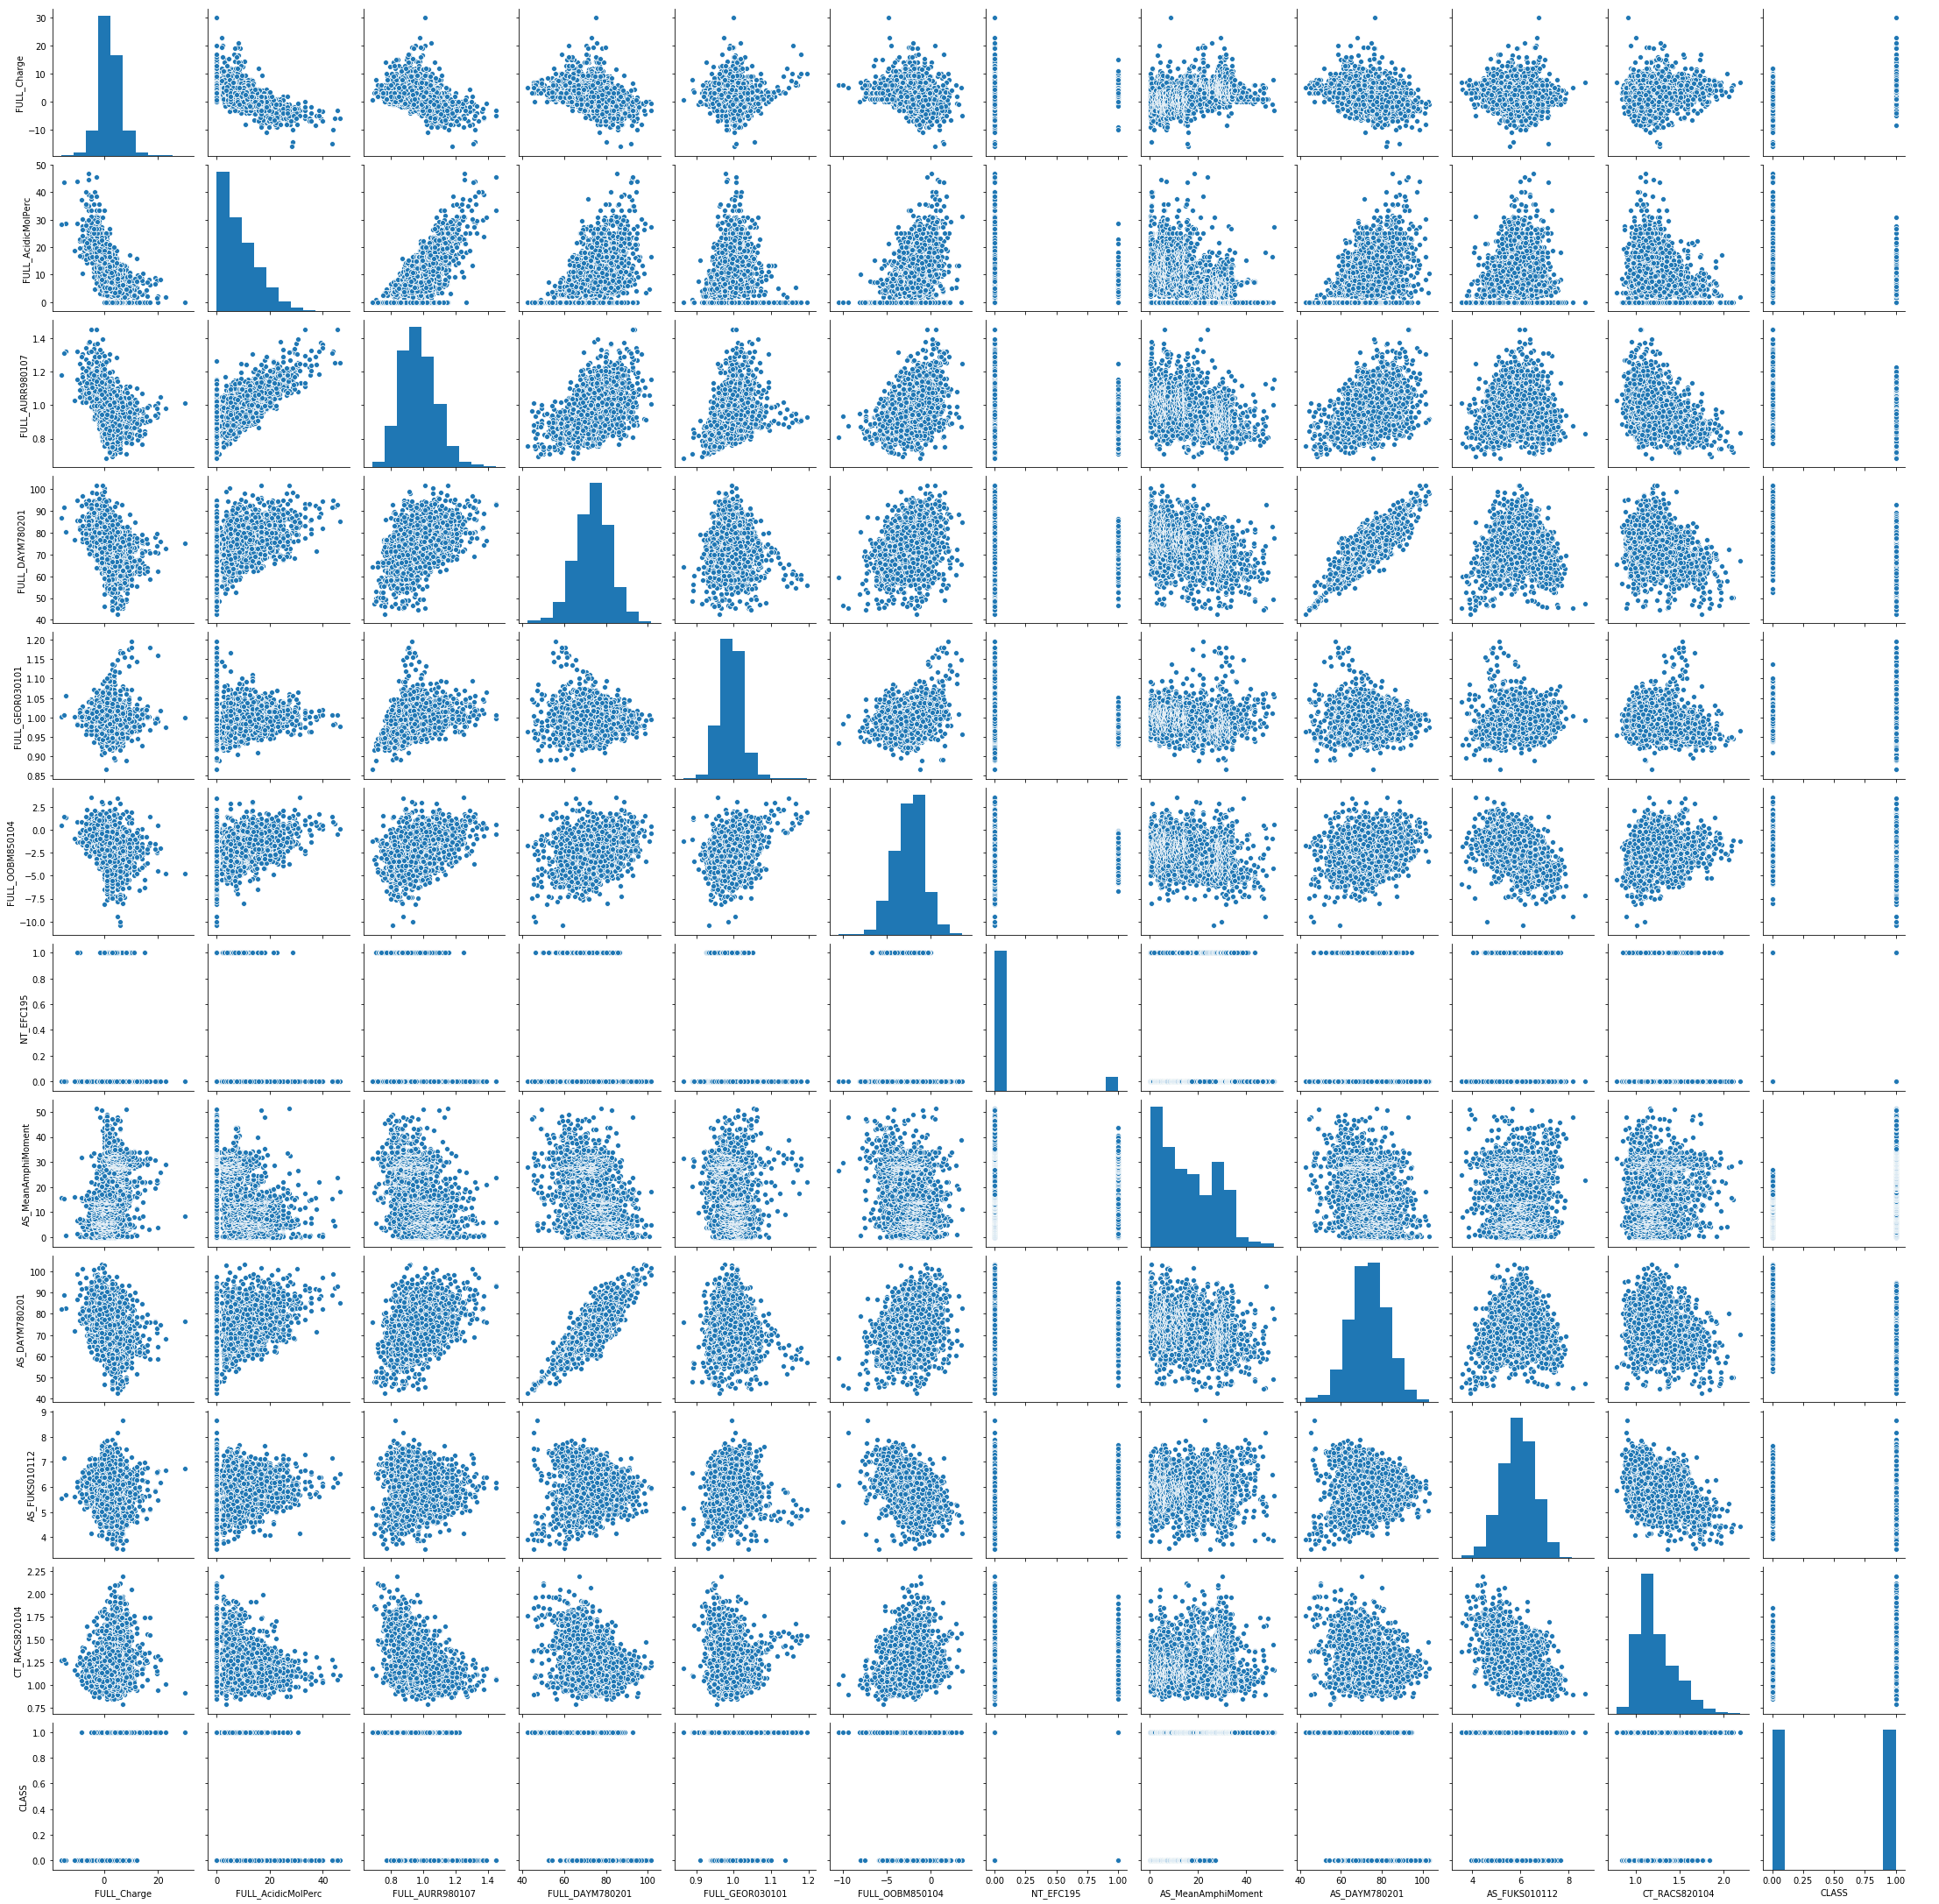

In [17]:
sns.pairplot(Train)

# Distribution plot

## A univariate plot to know about the distribution of data when analyzing effect on dependent variable with respective to a single feature

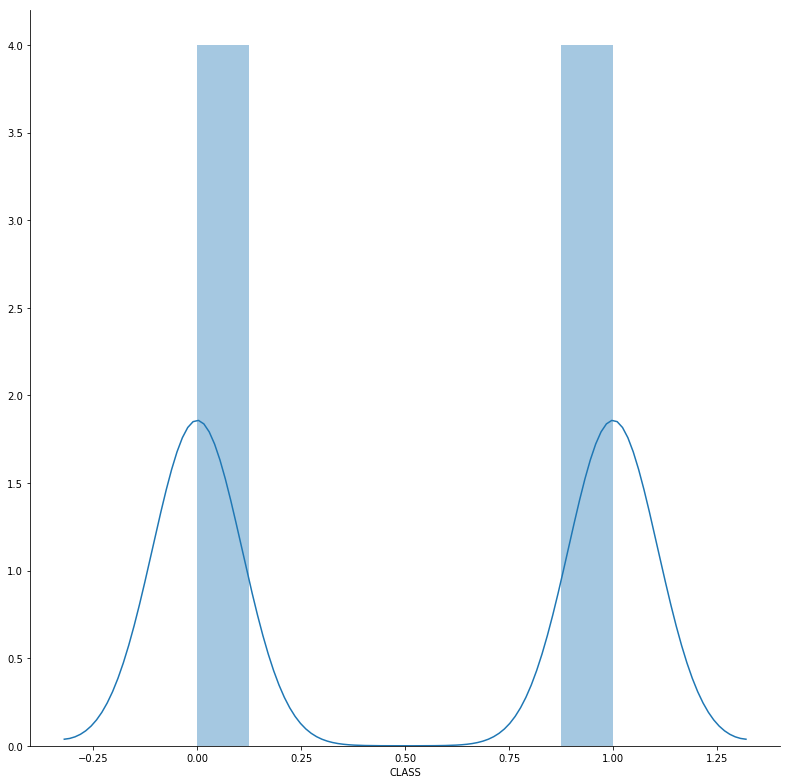

In [72]:
sns.FacetGrid(Train,size=11).map(sns.distplot,'CLASS').add_legend()

# Violoin plot
## This is a combination of a Box plot at the middle and distribution plots on both side of the data which gives us the details of distribution

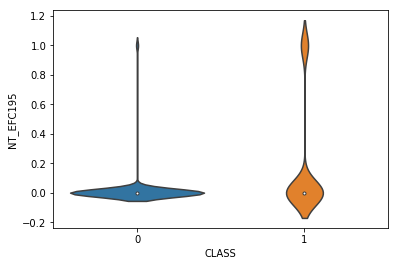

In [74]:
sns.violinplot(x='CLASS',y='NT_EFC195',data=Train,size=6)

# Classification

## From the statistical descriptions we saw that some variables had negative values and thus i decided to work the data for both rescaled data and the same data to see if these values will affect our final outcome

# Rescaling the data

## As the data scales vary in the dataset, rescaling is useful for optimization algorithms

In [20]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = Train.values
#separate array into input and output components
X = array[:,0:11]
Y = array[:,11]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
#set_printoptions(precision=3)
print(rescaledX[0:5,:])
np.random.seed(42)

[[0.45652174 0.         0.34810952 0.54455983 0.33030303 0.48322387
  0.         0.00470345 0.50780771 0.41489569 0.18194741]
 [0.43478261 0.1158206  0.3220339  0.48946243 0.27575758 0.45838093
  1.         0.01090966 0.42133501 0.58568922 0.47476901]
 [0.4673913  0.1158206  0.2464146  0.52339985 0.28787879 0.56539121
  0.         0.01077304 0.44157048 0.27315266 0.66595593]
 [0.45652174 0.08929222 0.27509778 0.39876468 0.4030303  0.64748715
  0.         0.01118289 0.4047757  0.15266134 0.42430704]
 [0.51086957 0.18293441 0.32333768 0.37280255 0.34242424 0.59544546
  0.         0.01122192 0.49952806 0.19633457 0.53589197]]


# Feature selection

## To select the features that contribute most to the prediction variable

## For this i chose the Recursive Feature Elimination method(RFE) which uses model accuracy to identify which attributes  contribute the most to predicting the target attribute

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array_1 = Train.values
X = array_1[:,0:11]
Y = array_1[:,11]
# feature extraction
#array = Train.values
# separate array into input and output components
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(rescaledX, Y)
print("Num Features: ",  fit.n_features_)
print("Selected Features:",  fit.support_)
print("Feature Ranking: ",  fit.ranking_)
np.random.seed(42)

Num Features:  8
Selected Features: [ True  True  True  True  True  True  True  True False False False]
Feature Ranking:  [1 1 1 1 1 1 1 1 3 4 2]


# Evaluating the performance of classification models

## The purpose is to know how well an algorithm performs on unseen data and thus be able to predict more accurately on your required data. This prevents overfitting which would occur if the algorithm is trained on the same data that it will test leaving you with perfect scores that are unrealistic.

# Split into train and test data
## This method separates your training data into a training and testing data set from which we can use a model and determine the accuracy of prediction

# KNeighborsClassifier model
## This classifier implements the k-nearest neighbors vote by assigning weights to the contributions of neighbours such that the nearer neighbours contribute more to the average than the distant ones

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))
np.random.seed(42)

Accuracy:  93.02093718843469


# Logistic Regression
## Describes data and explains the relationship between one variable and the other

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))
np.random.seed(42)

Accuracy:  91.82452642073778


# GaussianNB
## Bases on applying Bayes’ theorem with the assumption of conditional independence between every pair of features given the value of the class variable. This model works well in most real world scenarios.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = GaussianNB()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))
np.random.seed(42)

Accuracy:  91.32602193419741


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = GaussianNB()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))
np.random.seed(42)

Accuracy:  91.32602193419741


# Linear Discriminant Analysis
## This is a dimensionality reduction technique that reduces the dimensions while retaining as much information as possible

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))
np.random.seed(42)

Accuracy:  91.52542372881356


# Quadratic Discrimination Analysis

## A variation of LDA that is useful if there is prior knowledge that individual classes exhibit distinct covariance

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))
np.random.seed(42)

Accuracy:  91.42572283150548


# Stochastic Gradient Descent

##  A classification method used to find values of the parameters of a function minimizing the cost as much as possible. Stochastic implies that the process is linked with random probability where a few samples are selected at random rather than the whole data set

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = SGDClassifier()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))
np.random.seed(42)

Accuracy:  90.82751744765703


# Decision Tree classifier
## It is a predictive modeling approach that uses a decision tree to go from observations about an item to conclusions about the item's target value

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))
np.random.seed(42)

Accuracy:  90.72781655034895


# Random Forest Classifier

## This is a model that grows multiple trees and classifies objects based on votes votes of all the trees. It reduces the problem of overfitting or high bias

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = RandomForestClassifier()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))
np.random.seed(42)

Accuracy:  93.71884346959123


# Support Vector Machine
## supervised machine learning model that uses classification algorithms for two-group classification problems

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = SVC()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))
np.random.seed(42)

Accuracy:  92.72183449651047


# MLPC Classifier

## This is a multi-layer perceptron which utilizes supervized learning method called back propagation for training and can distinguish data that is not linearly seperable

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = MLPClassifier()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))
np.random.seed(42)

Accuracy:  92.42273180458625


# Confusion matrix
## This is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm. The ideal matrix has the false positives and false negatives as 0 indication perfect performance. 

## I added the code to identify the Matthew's Correlation Coefficient (MCC) which is a measure of the quality of the classification and a more accurate representation of which model actually performs better.

## KNeighborsClassifier

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)

model = KNeighborsClassifier()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)
MCC = matthews_corrcoef(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
print(MCC)
np.random.seed(42)

[[459  40]
 [ 30 474]]
0.8605725441658535


##  Logistic Regression

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)

model = LogisticRegression()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
MCC = matthews_corrcoef(Y_test, predicted)
print(matrix)
print(MCC)
np.random.seed(42)

[[462  37]
 [ 45 459]]
0.8366059082864942


## GaussianNB

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)

model = GaussianNB()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
MCC = matthews_corrcoef(Y_test, predicted)
print(matrix)
print(MCC)
np.random.seed(42)

[[452  47]
 [ 40 464]]
0.8265845955893641


## Linear Discriminant Analysis

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)

model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
MCC = matthews_corrcoef(Y_test, predicted)
print(matrix)
print(MCC)
np.random.seed(42)

[[467  32]
 [ 53 451]]
0.8312684884911692


# Quadratic Discriminant Analysis

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)

model = QuadraticDiscriminantAnalysis()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
MCC = matthews_corrcoef(Y_test, predicted)
print(matrix)
print(MCC)
np.random.seed(42)

[[469  30]
 [ 56 448]]
0.8296697478610895


# Stochastic Gradient Descent

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)

model = SGDClassifier()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
MCC = matthews_corrcoef(Y_test, predicted)
print(matrix)
print(MCC)
np.random.seed(42)

[[483  16]
 [ 77 427]]
0.8207511682545034


## Decision Tree Classifier

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
MCC = matthews_corrcoef(Y_test, predicted)
print(matrix)
print(MCC)
np.random.seed(42)

[[442  57]
 [ 40 464]]
0.8070067373092971


# Random Forest Classifier

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)

model = RandomForestClassifier()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
MCC = matthews_corrcoef(Y_test, predicted)
print(matrix)
print(MCC)
np.random.seed(42)

[[462  37]
 [ 29 475]]
0.8684916111334124


## Support Vector Manchine

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef


test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)

model = SVC()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
MCC = matthews_corrcoef(Y_test, predicted)
print(matrix)
print(MCC)
np.random.seed(42)

[[463  36]
 [ 37 467]]
0.8544362182076787


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef


test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)

model = MLPClassifier()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
MCC = matthews_corrcoef(Y_test, predicted)
print(matrix)
print(MCC)
np.random.seed(42)

[[461  38]
 [ 39 465]]
0.8464600116371953


# Classification Report

## This is a convenient report that provides precision, recall, f1- score and support for each class. This helps to provide a quick idea of the accuracy of the model 


## KNeighborsClassifier

In [43]:
from sklearn.metrics import classification_report

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)
np.random.seed(42)

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       499
         1.0       0.92      0.94      0.93       504

    accuracy                           0.93      1003
   macro avg       0.93      0.93      0.93      1003
weighted avg       0.93      0.93      0.93      1003



# Logistic Regression

In [44]:
from sklearn.metrics import classification_report

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)
np.random.seed(42)

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       499
         1.0       0.93      0.91      0.92       504

    accuracy                           0.92      1003
   macro avg       0.92      0.92      0.92      1003
weighted avg       0.92      0.92      0.92      1003



# GaussianNB

In [45]:
from sklearn.metrics import classification_report

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = GaussianNB()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)
np.random.seed(42)

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       499
         1.0       0.91      0.92      0.91       504

    accuracy                           0.91      1003
   macro avg       0.91      0.91      0.91      1003
weighted avg       0.91      0.91      0.91      1003



# Linear Discriminant Analysis

In [46]:
from sklearn.metrics import classification_report

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)
np.random.seed(42)

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       499
         1.0       0.93      0.89      0.91       504

    accuracy                           0.92      1003
   macro avg       0.92      0.92      0.92      1003
weighted avg       0.92      0.92      0.92      1003



# Quadratic Discriminant Analysis

In [47]:
from sklearn.metrics import classification_report

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)
np.random.seed(42)

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92       499
         1.0       0.94      0.89      0.91       504

    accuracy                           0.91      1003
   macro avg       0.92      0.91      0.91      1003
weighted avg       0.92      0.91      0.91      1003



# Stochastic Gradient Descent

In [48]:
from sklearn.metrics import classification_report

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = SGDClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)
np.random.seed(42)

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       499
         1.0       0.92      0.92      0.92       504

    accuracy                           0.92      1003
   macro avg       0.92      0.92      0.92      1003
weighted avg       0.92      0.92      0.92      1003



# Decision Tree Classifier

In [49]:
from sklearn.metrics import classification_report

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)
np.random.seed(42)

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90       499
         1.0       0.89      0.92      0.90       504

    accuracy                           0.90      1003
   macro avg       0.90      0.90      0.90      1003
weighted avg       0.90      0.90      0.90      1003



# Random Forest Classifier

In [50]:
from sklearn.metrics import classification_report

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = RandomForestClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)
np.random.seed(42)

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       499
         1.0       0.93      0.95      0.94       504

    accuracy                           0.94      1003
   macro avg       0.94      0.94      0.94      1003
weighted avg       0.94      0.94      0.94      1003



# Support Vector Machine

In [51]:
from sklearn.metrics import classification_report

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = SVC()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)
np.random.seed(42)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       499
         1.0       0.93      0.93      0.93       504

    accuracy                           0.93      1003
   macro avg       0.93      0.93      0.93      1003
weighted avg       0.93      0.93      0.93      1003



In [52]:
from sklearn.metrics import classification_report

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX[:,(0,1,2,3,4,5,6,7)], Y, test_size=test_size,
random_state=seed)
model = MLPClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)
np.random.seed(42)

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       499
         1.0       0.92      0.93      0.92       504

    accuracy                           0.92      1003
   macro avg       0.92      0.92      0.92      1003
weighted avg       0.92      0.92      0.92      1003



# For downstream work,we have to rescale the test dataset so that the predictions can fit on the test data and be accurate since the training data set was rescaled

In [53]:
array2 = Test.values
# separate array into input and output components
X1 = array2[:,0:10]
Y1 = array2[:,10]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX1 = scaler.fit_transform(X1)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX1[0:5,:])
np.random.seed(42)

[[0.395 0.084 0.238 0.474 0.334 0.305 0.    0.006 0.493 0.903]
 [0.395 0.101 0.264 0.276 0.143 0.736 0.    0.005 0.162 0.293]
 [0.349 0.    0.276 0.    0.512 0.221 0.    0.002 0.    0.568]
 [0.407 0.    0.232 0.397 0.317 0.246 0.    0.039 0.397 0.432]
 [0.209 0.489 0.495 0.441 0.297 0.592 0.    0.054 0.34  0.464]]


# The following code compares the algorithms consistently outputting accuracy scores and MCC.
## This code uses K-fold cross validation method to evaluate the model. This method bases on randomly partitioning data into k equal sized subsamples with a single subsample retained as the validation data for testing the model, and the remaining are used as training data. The process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. This method tests the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting. 
### I also added MCC to the code for better interpretation

('LR', 0.8963016889924288, 0.16211853294783915)
0.8291517676194832
('LDA', 0.8963858150520936, 0.1799113746095651)
0.8255199463756335
('KNN', 0.9061897366207211, 0.1200882325749525)
0.8908689408786037
('CART', 0.866084255484372, 0.15887996965975262)
1.0
('NB', 0.9112858344657995, 0.07330451889431207)
0.8373932031860843
('SVM', 0.9107551931663755, 0.11541841101681918)
0.8711157492848431
('RFC', 0.903905390539054, 0.14866424598613984)
1.0
('SDG', 0.895343946159322, 0.1577228535018588)
0.8373079014472816
('QDA', 0.9085355594382968, 0.13705713723268131)
0.8402860361447919
('MLPC', 0.9055231993787615, 0.14519767006529813)
0.8605090877747426


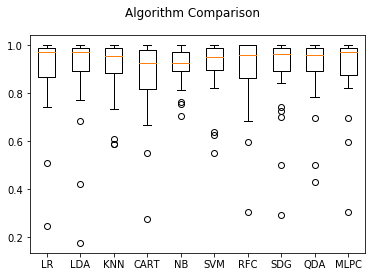

In [54]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import matthews_corrcoef

array = Train.values 
X = array[:,0:11]
Y = array[:,11]

# prepare models and add them to a list
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SDG', SGDClassifier()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('MLPC', MLPClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=30, random_state=14)
    cv_results = cross_val_score(model, rescaledX[:,(0,1,2,3,4,5,6,7)], Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)
    model.fit(rescaledX[:,(0,1,2,3,4,5,6,7)], Y)
    predicted = model.predict(rescaledX[:,(0,1,2,3,4,5,6,7)])
    MCC = matthews_corrcoef(Y, predicted)
    print(MCC)
    

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
np.random.seed(42)

# From the above evaluations;
## From the Split test and train data, KNeighborsClassifier and RandomForestClassifier had the highest accuracy and MCC. While from the Kfold cross validation data, GaussianNB and Support Vector Machine had the highest accuracy while Decision Tree Classifier and RandomForestClassifier had the highest MCC both equating to 1.0.

## In order to determine the most ideal model for prediction, i run the prediction algorithms using each of the 4 mentioned models and submitted the csv files in order to compare the scores

# KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
model.fit(rescaledX[:,(0,1,2,3,4,5,6,7)], Y)
model.predict(rescaledX1[:,(0,1,2,3,4,5,6,7)])
prediction = model.predict(rescaledX1[:,(0,1,2,3,4,5,6,7)])
test_pred = pd.DataFrame(prediction)
test_pred.columns = ["CLASS"]
test_pred.index.name = "Index"
test_pred['CLASS']= test_pred['CLASS'].map({0.0:False,1.0:True})

test_pred.to_csv("test_pred.csv")
print(test_pred['CLASS'].unique())
print(test_pred.groupby('CLASS').size()[0].sum())
print (test_pred.groupby('CLASS').size()[1].sum())
test_pred

# RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(rescaledX[:,(0,1,2,3,4,5,6,7)],Y)
model.predict(rescaledX1[:,(0,1,2,3,4,5,6,7)])
prediction = model.predict(rescaledX1[:,(0,1,2,3,4,5,6,7)])
test_pred = pd.DataFrame(prediction)
test_pred.columns = ["CLASS"]
test_pred.index.name = "Index"
test_pred['CLASS']= test_pred['CLASS'].map({0.0:False,1.0:True})

test_pred.to_csv("test_pred.csv")
print(test_pred['CLASS'].unique())
print(test_pred.groupby('CLASS').size()[0].sum())
print (test_pred.groupby('CLASS').size()[1].sum())
test_pred

# GaussianNB

In [ ]:
model = GaussianNB()
model.fit(rescaledX[:,(0,1,2,3,4,5,6,7)],Y)
model.predict(rescaledX1[:,(0,1,2,3,4,5,6,7)])
prediction = model.predict(rescaledX1[:,(0,1,2,3,4,5,6,7)])
test_pred = pd.DataFrame(prediction)
test_pred.columns = ["CLASS"]
test_pred.index.name = "Index"
test_pred['CLASS']= test_pred['CLASS'].map({0.0:False,1.0:True})

test_pred.to_csv("test_pred.csv")
print(test_pred['CLASS'].unique())
print(test_pred.groupby('CLASS').size()[0].sum())
print (test_pred.groupby('CLASS').size()[1].sum())
test_pred

# Support Vector Machine

In [ ]:
model = SVC()
model.fit(rescaledX[:,(0,1,2,3,4,5,6,7)], Y)
model.predict(rescaledX1[:,(0,1,2,3,4,5,6,7)])
prediction = model.predict(rescaledX1[:,(0,1,2,3,4,5,6,7)])
test_pred = pd.DataFrame(prediction)
test_pred.columns = ["CLASS"]
test_pred.index.name = "Index"
test_pred['CLASS']= test_pred['CLASS'].map({0.0:False,1.0:True})

test_pred.to_csv("test_pred.csv")
print(test_pred['CLASS'].unique())
print(test_pred.groupby('CLASS').size()[0].sum())
print (test_pred.groupby('CLASS').size()[1].sum())
test_pred

# I discovered that the best submission score came from the GaussianNB that had the highest accuracy score in the Kfold cross validation and a moderate MCC compared to the other models. The KNeighborsClassifier and Random Forest Classifier models performed more poorly than the GaussianNB even though they had higher accuracy and MCC from split train and test evaluation

# From this i concluded that the kfold cross validation method of evaluating machine learning algorithm performance is much more powerful and accurate than splitting into test and train data sets and therefore chose GaussianNB as my prediction model

# I decicded to also test whether transforming the dataset by rescaling actually affected the model's functionality by re-evaluating using kfold cross validation to see whether there would be any change in the accuracy or MCC of the model chosen to be the most optimal

('LR', 0.8943247265903062, 0.162873362398774)
0.828938232514105
('LDA', 0.8963858150520936, 0.1799113746095651)
0.8255199463756335
('KNN', 0.8770335857115124, 0.17594457775454864)
0.8779894851762285
('CART', 0.8677344205008736, 0.1548200470576966)
1.0
('NB', 0.9112858344657995, 0.07330451889431207)
0.8373932031860843
('SVM', 0.8907493690545525, 0.17026277479915633)
0.8232711504654338
('RFC', 0.9042257166893161, 0.14477625867527003)
1.0
('SDG', 0.8307836666019542, 0.25971818704698796)
0.8018651437697866
('QDA', 0.9085355594382968, 0.13705713723268131)
0.8402860361447919
('MLPC', 0.8980100951271599, 0.14788759801505816)
0.8539963165702505


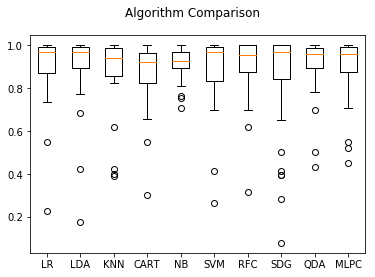

In [55]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import matthews_corrcoef

array = Train.values 
X = array[:,0:11]
Y = array[:,11]

# prepare models and add them to a list
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SDG', SGDClassifier()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('MLPC', MLPClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=30, random_state=14)
    cv_results = cross_val_score(model, X[:,(0,1,2,3,4,5,6,7)], Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)
    model.fit(X[:,(0,1,2,3,4,5,6,7)], Y)
    predicted = model.predict(X[:,(0,1,2,3,4,5,6,7)])
    MCC = matthews_corrcoef(Y, predicted)
    print(MCC)
    

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
np.random.seed(42)

# It was discovered that evaluating non-rescaled data didn't change GaussianNB's accuracy or MCC, as well as most of the models. BUt it did change for the following;
## - KNeighborsClassifier; where the accuracy and MCC both reduced
## - DecisionTreeClassifier; where the accuracy reduced
## - RandomForestClassifier; where accuracy reduced
## - Support Vector Machine; where the accuracy and MCC both reduced
## - Stochastic Gradient Descent; where the accuracy and MCC both reduced
## - MLPClassifier; where the MCC increased

# This prompted me to make a prediction using also the non-rescaled data to see if there would be a change in the score submission.

In [63]:
model = GaussianNB()
model.fit(X[:,(0,1,2,3,4,5,6,7)],Y)
model.predict(X1[:,(0,1,2,3,4,5,6,7)])
prediction = model.predict(X1[:,(0,1,2,3,4,5,6,7)])
test_pred = pd.DataFrame(prediction)
test_pred.columns = ["CLASS"]
test_pred.index.name = "Index"
test_pred['CLASS']= test_pred['CLASS'].map({0.0:False,1.0:True})

test_pred.to_csv("test_pred.csv")
print(test_pred['CLASS'].unique())
print(test_pred.groupby('CLASS').size()[0].sum())
print (test_pred.groupby('CLASS').size()[1].sum())
test_pred

[ True False]
372
386


,CLASS
Index,
0,True
1,True
2,True
3,True
4,False
...,...
753,False
754,False
755,False


# From this prediction, the submission score was found to be slightly higher than the rescaled data.
## It was also discovered that the higher the number of features selected the higher the accuracy of the models and the higher the score after submission.
## The final testing was to see whether the score would improve if all features were considered and the prediction was done on all the data

In [64]:
model = GaussianNB()
model.fit(X[:,0:10],Y)
model.predict(X1)
prediction = model.predict(X1)
test_pred = pd.DataFrame(prediction)
test_pred.columns = ["CLASS"]
test_pred.index.name = "Index"
test_pred['CLASS']= test_pred['CLASS'].map({0.0:False,1.0:True})

test_pred.to_csv("test_pred.csv")
print(test_pred['CLASS'].unique())
print(test_pred.groupby('CLASS').size()[0].sum())
print (test_pred.groupby('CLASS').size()[1].sum())
test_pred

[ True False]
374
384


,CLASS
Index,
0,True
1,True
2,True
3,True
4,False
...,...
753,False
754,False
755,False


# It was discovered that the highest score was obtained from the set which was predicted without features selected.

# In conclusion, Kfold cross validation is a better tool for evaluating the performance of a machine learning algorithm than splitting the data into test and training sets. It was also noted that accuracy or MCC alone are not efficient measures of model functionality as we saw the models with the highest accuracy in split test and train data did not perform best upon submission. The best model for this data set is the GaussianNB model which coincides with previous claims that it works best for real world data. An MCC OF 1.0 indicates a perfect agreement between actuals and predictions. Thus we would expect that KNeighborsClassifier and RandomForestClassifier would perform the best at prediction. However we see that they did not perform as expected which can be put down to a high rate of false positives and false negatives being generated.
# Therefore we need to consider several factors such as precision and F1-score before we conclude which model is best.

# Literature:
## -wikipedia
## -class notes
## -https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
## -https://medium.com/datadriveninvestor/classification-algorithms-in-machine-learning-85c0ab65ff4
## -https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/
## -https://data-flair.training/blogs/machine-learning-classification-algorithms/
## -https://www.datascienceblog.net/post/machine-learning/linear-discriminant-analysis/
## -https://towardsdatascience.com/data-visualization-for-machine-learning-and-data-science-a45178970be7
## -https://seaborn.pydata.org/generated/seaborn.distplot.html
## -https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7